In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



# import warnings
# warnings.filterwarnings('ignore')

In [2]:
path = "../data/all_salary_stats.csv"
df= pd.read_csv(path)
df.drop(columns=['Position(s)','Unnamed: 0','Unnamed: 0.1',
                 'First Name', 'Last Name', 'name', '_merge',
                 'Guaranteed Compensation'],inplace=True)
df.shape

(705, 103)

In [9]:
## start with df corr of key features !!! 

3. IDENTIFYING AND CREATING FEATURES
Variables and features are almost synonymous. The primary difference tends to be the context in which they are used; in machine learning, it is common practice to identify predictive features in your data whereas in parametric statistics, features are often referred to as variables and variables can include the response variable which you predict with your model.

The goal of identifying features is to use your exploratory work to isolate features that will be most helpful in constructing a predictive model. In addition to recognizing those features, it often behooves one to create additional features for inclusion in your predictive modeling work.
Once you have identified the critical features for your model development, you may realize you need to create additional features to augment your original data. You can do this through the development of combining features or revaluing them to emphasize specific relationships. Additional features can also be created through Principal Components Analysis or Clustering.

Building a Principle Components Analysis (PCA) is a useful way to apply a dimension reduction application to identify which features contain the most amount of variation within your development dataset. The predictive model can be constructed on the principal components themselves as features, resulting in feature reduction. Feature reduction is helpful when your data set has too many features to choose from, and you need a more automated way to reduce the number of input features for modeling. There are different flavors of dimension reduction methods based on multi-dimensional scaling, such as Principal Coordinate Analysis. Lasso regression is another tool for a semi-automated feature selection approach. Review these methods to determine the best strategy for your project.


Clustering (e.g. K-means clustering) is an excellent exploratory analysis method for creating additional features which in this case would be the clusters themselves. The clusters can be used in conjunction with additional features if you find them to be valid after review.

# Feature engineering 


### 1-convert player season data to per 90 stats to adjust for different amounts of games played per player.

### 2- create possesion adjusted stats for defensive KPIs to better show defenders metrics 

## objective -1 Adjust season stats to per ninety stats for accurate stat comparison.

In [12]:
# players to deal with playing less than 1 game for calculations
len(df[df['Nineties']<1])

35

In [4]:
def per_90(cols,df):
    # create list of games played values and map anything less than 1 to one 
    nines=[i if i >1 else 1 for i in df['Nineties'] ]
    # use new list to do calc so not dividing by value less than 1 
    for col in cols:
        df[col] = df[col]/nines
    return df


In [5]:
df.columns.values

array(['fb_id', 'player_name', 'Squad_from_op', 'Opposing_Poss',
       'Opposing_Touches', 'Player', 'Nation', 'Position',
       'Total_tackles', 'Tackles_Won', 'Tackles_Def_3rd',
       'Tackles_Mid_3rd', 'Tackles_Att_3rd', 'Num_Dribblers_tackled',
       'Num_Dribbled_past', 'total_pressing', 'Won_ball_5_sec',
       'Tackle_pct_won', 'pres_Def_3rd', 'pres_Mid_3rd', 'pres_Att_3rd',
       'Blocks', 'Blocked_shots', 'Blocked_SOT', 'Blocked_pass',
       'Interceptions', 'Tackles_and_Ints', 'Clearences', 'Nineties',
       'xA', 'Key_pass', 'Comp_prog', 'Total_Cmp', 'Total_Att',
       'Total_Cmp_pct', 'Total_Tot_Dist', 'Total_Prg_Dist', 'Short_Cmp',
       'Short_Att', 'Short_Cmp_pct', 'Medium_Cmp', 'Medium_Att',
       'Medium_Cmp_pct', 'Long_Cmp', 'Long_Att', 'Long_Cmp_pct',
       'touches', 'touches_def_box', 'touches_def_3rd', 'touches_mid_3rd',
       'touches_att_3rd', 'touches_att_box', 'touch_live', 'dribble_Succ',
       'dribble_Att', 'dribble_Succ_pct', 'num_dribble_past

In [6]:
## create list of columns to be adjusted to per 90 stats
cols =  [
         # this needs to be done on by teams 90's 'Opposing_Touches',
    'Opposing_Touches',
    # def stats
    'Total_tackles', 'Tackles_Won', 'Tackles_Def_3rd',
       'Tackles_Mid_3rd', 'Tackles_Att_3rd', 'Num_Dribblers_tackled',
       'Num_Dribbled_past', 'total_pressing', 'Won_ball_5_sec',
       'Tackle_pct_won', 'pres_Def_3rd', 'pres_Mid_3rd', 'pres_Att_3rd',
       'Blocks', 'Blocked_shots', 'Blocked_SOT', 'Blocked_pass',
       'Interceptions', 'Tackles_and_Ints', 'Clearences',
    # passing stats
'xA','Key_pass','Comp_prog','Total_Cmp','Total_Att','Total_Tot_Dist','Total_Prg_Dist','Short_Cmp','Short_Att','Medium_Cmp','Medium_Att','Long_Cmp','Long_Att',
'touches','touches_def_box','touches_def_3rd','touches_mid_3rd','touches_att_3rd','touches_att_box','touch_live',
    # attacking stats
    'dribble_Succ','dribble_Att','num_dribble_past','dribble_megs','carries','carries_dist','carries_prog_dist','carries_prog','carries_att_3rd','carries_att_box','miss_control','dispossed','recep_targ',
'recep_succ','Yellow_cards','Red_cards','Second_yellow','Fouls','Fouls_drawn','Offsides','Crosses','def_interceptions',
    # mish stats 
    'from_mish_tackles_won','PK_won','PK_conceded','OG',
'Recoveries','Aerial_Duels_lost','Gls','Sh','SoT','Sh/90','SoT/90','G/Sh','G/SoT','Dist','FK','PK','PKatt', 'xG','npxG','npxG/Sh','G-xG','np:G-xG'


]

In [8]:

df =  per_90(cols,df)
df[['player_name','Opposing_Touches','Total_tackles','Key_pass','from_mish_tackles_won','Total_Cmp','Total_Att']].head(3)

,player_name,Opposing_Touches,Total_tackles,Key_pass,from_mish_tackles_won,Total_Cmp,Total_Att
0,Carles Gil,788.346457,0.393701,5.275591,0.157480,48.818898,65.708661
1,Julian Gressel,686.488294,1.538462,3.210702,0.635452,37.324415,57.926421
2,Emanuel Reynoso,788.188679,2.226415,3.433962,1.622642,42.113208,61.056604


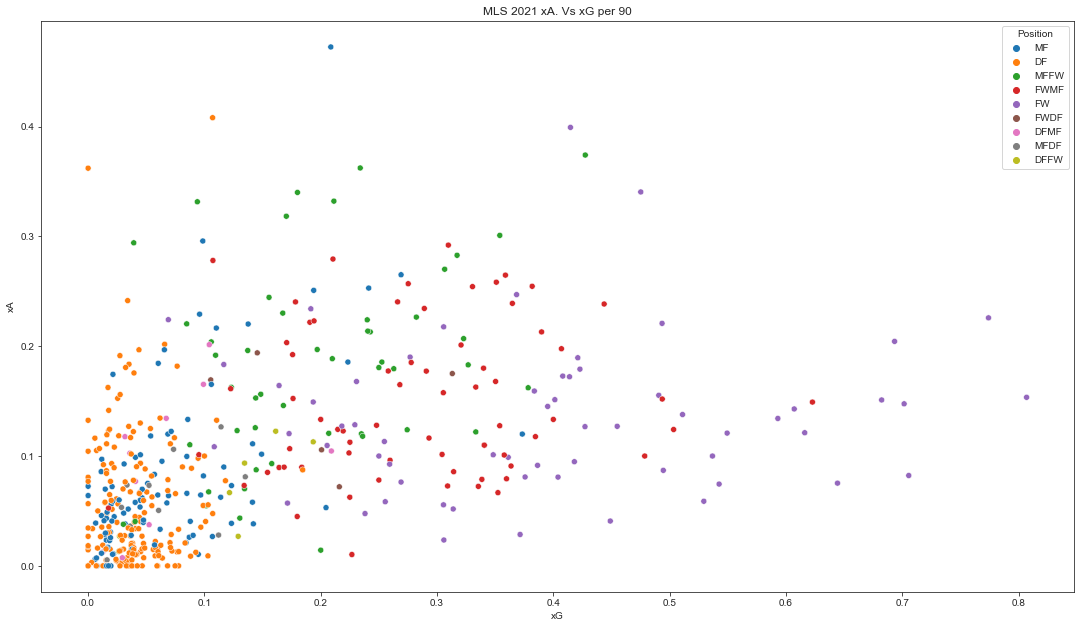

In [13]:
graph = df.loc[(df['Position']!='GK')&(df['Aerial_win_pct']<100)&
               (df['Aerial_win_pct']>0)&(df['Nineties']>5)]

#& other to add above (df['int_tackl_recover']<35)
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
g = sns.scatterplot(data=graph, x ='xG', y='xA',hue='Position', ax=ax).set(title='MLS 2021 xA. Vs xG per 90')


In [14]:
df.loc[df['xG']>1][['xG','xA','player_name', 'Squad_from_op','Nineties','Gls']]

,xG,xA,player_name,Squad_from_op,Nineties,Gls
470,1.272727,0.090909,Abu Danladi,Nashville,1.1,0.909091


In [15]:
df.loc[df['xA']>.7][['xG','xA','player_name', 'Squad_from_op','Nineties','Gls']]

,xG,xA,player_name,Squad_from_op,Nineties,Gls
471,0.352941,0.764706,Léo Chú,Seattle,1.7,0.588235


## Insight 
- feature engineering gives players who have not played to many games some edge and can be filtered out for models if needed. 
- The expected trends of forwards haivng the most xG by the green points to the right side of the graph.
- Midfielders having the most xA or a mix of both can be seen  and the blue ones towards the top half of the graph around 5 to 10 xG. 
- There is only two defenders with xA above 6 and no defenders above 4 xG, the majority are clusterd in the bottom left of the graph. 

In [11]:
## check players who played less than 1 game no not have increased features

df.loc[(df['player_name']=='Jason Pendant') | (df['player_name']=='Jordan Harvey') ][['player_name', 'Squad_from_op',
       'Long_Att','Long_Cmp','Long_Cmp_pct', 'Nation', 'Position', 'Nineties',
       'xA', 'Key_pass']]

,player_name,Squad_from_op,Long_Att,Long_Cmp,Long_Cmp_pct,Nation,Position,Nineties,xA,Key_pass
605,Jason Pendant,NY Red Bulls,4.0,3.0,75.0,fr FRA,DF,0.1,0.0,0.0
609,Jordan Harvey,Los Angeles FC,5.0,5.0,100.0,us USA,DF,0.1,0.0,0.0


check to confirm the new df has per 90 stats instead of season totals 

## Objective - 2  Create possesion adjusted metrics , " pAdj "

using stat per 1000 opponent touches as scale to create pAdj stat 
ex: tackles per 1000 opponent touches instead of just tackles per 90 

In [23]:
df['Opposing_Touches'].value_counts().head()

17.734429    5
17.788062    3
2.156327     3
18.493080    3
16.284602    3
Name: Opposing_Touches, dtype: int64

In [ ]:
# broken here 







In [22]:
# each team played 34 games so to get opposing touches per 90 divide by 34

df['Opposing_Touches'] = df['Opposing_Touches']/34
df['Opposing_Touches'].describe()

count    705.000000
mean       3.376845
std        4.747305
min        0.488649
25%        0.803569
50%        1.262471
75%        3.057814
max       19.391003
Name: Opposing_Touches, dtype: float64

In [18]:

cols=[
      # defensive stats to be adjusted by possesion 
    'Yellow_cards','Red_cards','Second_yellow','Fouls','def_interceptions',
    'from_mish_tackles_won','PK_conceded','OG','Recoveries','Aerial_Duels_lost']

In [19]:
df['def_interceptions'].describe()

count    705.000000
mean       1.325073
std        0.962239
min        0.000000
25%        0.510949
50%        1.323529
75%        1.959459
max        5.000000
Name: def_interceptions, dtype: float64

In [20]:
def pAdj(df,cols):
  """ create possesion adjusted defensive stats and remove orignial"""
  for col in cols:
    label = 'pAdj_'+col
  
    df[label] = (df[col]/df['Opposing_Touches']) * 1000
    df.drop(columns=[col],inplace=True)
  
  return df

In [21]:
df=pAdj(df,cols)
df[[ 'player_name','pAdj_def_interceptions','pAdj_from_mish_tackles_won','pAdj_PK_conceded','pAdj_OG','pAdj_Recoveries','pAdj_Aerial_Duels_lost']].head()

,player_name,pAdj_def_interceptions,pAdj_from_mish_tackles_won,pAdj_PK_conceded,pAdj_OG,pAdj_Recoveries,pAdj_Aerial_Duels_lost
0,Carles Gil,39.053136,6.791850,0.0,0.0,278.465841,6.791850
1,Julian Gressel,112.637630,31.472279,0.0,0.0,415.765371,49.693072
2,Emanuel Reynoso,43.950783,69.995691,0.0,0.0,322.305740,29.300522
3,Albert Rusnák,44.089424,28.217231,0.0,0.0,358.006121,7.054308
4,Maximiliano Moralez,40.451066,45.727292,0.0,0.0,293.709911,17.587420


In [27]:
df['pAdj_def_interceptions'].describe()

count    705.000000
mean       2.231026
std        1.625044
min        0.000000
25%        0.847926
50%        2.225200
75%        3.271473
max        8.502551
Name: pAdj_def_interceptions, dtype: float64

In [ ]:
df['int_tackl_blocks'] = df['pAdj_def_interceptions']+df['pAdj_from_mish_tackles_won']+df['pAdj_Recoveries']


In [28]:
# save df with adjusted features for further steps

df.to_csv('../data/final_per_90_and_pAdj.csv', encoding='utf-8', index=False)



In [29]:
df.head()

,fb_id,player_name,Squad_from_op,Opposing_Poss,Opposing_Touches,Nation,Position,Nineties,xA,Key_pass,...,pAdj_Yellow_cards,pAdj_Red_cards,pAdj_Second_yellow,pAdj_Fouls,pAdj_def_interceptions,pAdj_from_mish_tackles_won,pAdj_PK_conceded,pAdj_OG,pAdj_Recoveries,pAdj_Aerial_Duels_lost
0,11c30a46,Carles Gil,New England,49.1,588.941176,es ESP,MF,25.4,0.472441,5.275591,...,11.230618,0.000000,0.0,0.467942,1.537525,0.267396,0.0,0.0,10.963222,0.267396
1,acd47bc0,Julian Gressel,D.C. United,54.0,603.705882,de GER,DF,29.9,0.408027,3.210702,...,6.260108,0.000000,0.0,1.938972,3.767145,1.052585,0.0,0.0,13.905196,1.661976
2,614b26e3,Emanuel Reynoso,Minnesota Utd,49.9,614.323529,ar ARG,MF,26.5,0.332075,3.433962,...,13.821001,0.061427,0.0,3.562747,1.658520,2.641347,0.0,0.0,12.162481,1.105680
3,0adeafaa,Albert Rusnák,Real Salt Lake,49.1,567.029412,sk SVK,MF,33.8,0.213018,2.573964,...,8.191763,0.000000,0.0,1.200067,1.304421,0.834829,0.0,0.0,10.591897,0.208707
4,f99f37fc,Maximiliano Moralez,NYCFC,46.5,568.588235,ar ARG,MF,26.5,0.362264,3.132075,...,14.932715,0.066368,0.0,2.986543,1.526455,1.725558,0.0,0.0,11.083393,0.663676


## Feature vizual exploration 

- with the data now scaled to per 90 and possesion adjusted key features are to be visualised and observed below to looks for trends. 

In [33]:
# create defender only df 
defenders = df.loc[(df['Position']=='DF')&( df['Nineties'] >.9)]

In [34]:
#summary stats table transposed for df

# put higher up and show key features 
defenders.describe().T

,count,mean,std,min,25%,50%,75%,max
Opposing_Poss,216.0,49.991667,3.215475,42.600000,47.400000,50.200000,51.900000,55.100000
Opposing_Touches,216.0,594.614379,29.964880,513.205882,577.647059,593.529412,620.470588,659.294118
Nineties,216.0,16.545370,9.163085,1.000000,8.900000,17.150000,23.325000,34.000000
xA,216.0,0.052368,0.062253,0.000000,0.008474,0.030152,0.078985,0.408027
Key_pass,216.0,0.535475,0.561490,0.000000,0.125590,0.312500,0.825563,3.210702
...,...,...,...,...,...,...,...,...
pAdj_from_mish_tackles_won,216.0,1.816016,0.868210,0.000000,1.258789,1.783555,2.291729,6.174785
pAdj_PK_conceded,216.0,0.033753,0.086475,0.000000,0.000000,0.000000,0.054912,0.972621
pAdj_OG,216.0,0.020748,0.114465,0.000000,0.000000,0.000000,0.000000,1.598856
pAdj_Recoveries,216.0,12.555701,2.660552,3.714538,10.968225,12.165533,14.247242,22.106632


# Passing features 